In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score, roc_curve, auc, classification_report
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Using TensorFlow backend.


In [2]:
kaggle_test = pd.read_pickle('output/test_fe.pickle')
kaggle_test.head()

,Id,Date,Latitude,Longitude,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,most_recent_spray,Station,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Month,Year,Weather_hot_dry,Weather_normal,Tmax14_days_Min,Tmax14_days_Max,Tmax14_days_Avg,Tmax14_days_Std_dev,Tmin14_days_Min,Tmin14_days_Max,Tmin14_days_Avg,Tmin14_days_Std_dev,Tavg14_days_Min,Tavg14_days_Max,Tavg14_days_Avg,Tavg14_days_Std_dev,DewPoint14_days_Min,DewPoint14_days_Max,DewPoint14_days_Avg,DewPoint14_days_Std_dev,WetBulb14_days_Min,WetBulb14_days_Max,WetBulb14_days_Avg,WetBulb14_days_Std_dev,Heat14_days_Min,Heat14_days_Max,Heat14_days_Avg,Heat14_days_Std_dev,Cool14_days_Min,Cool14_days_Max,Cool14_days_Avg,Cool14_days_Std_dev,PrecipTotal14_days_Min,PrecipTotal14_days_Max,PrecipTotal14_days_Avg,PrecipTotal14_days_Std_dev,StnPressure14_days_Min,StnPressure14_days_Max,StnPressure14_days_Avg,StnPressure14_days_Std_dev,SeaLevel14_days_Min,SeaLevel14_days_Max,SeaLevel14_days_Avg,SeaLevel14_days_Std_dev,ResultSpeed14_days_Min,ResultSpeed14_days_Max,ResultSpeed14_days_Avg,ResultSpeed14_days_Std_dev,ResultDir14_days_Min,ResultDir14_days_Max,ResultDir14_days_Avg,ResultDir14_days_Std_dev,AvgSpeed14_days_Min,AvgSpeed14_days_Max,AvgSpeed14_days_Avg,AvgSpeed14_days_Std_dev,ResultSpeed14_days_Std_dev^2,ResultSpeed14_days_Std_dev^3,AvgSpeed14_days_Max^2,AvgSpeed14_days_Max^3,ResultSpeed14_days_Max^2,ResultSpeed14_days_Max^3,WetBulb14_days_Max^2,WetBulb14_days_Max^3,AvgSpeed14_days_Std_dev^2,AvgSpeed14_days_Std_dev^3,DewPoint14_days_Avg^2,DewPoint14_days_Avg^3,WetBulb14_days_Avg^2,WetBulb14_days_Avg^3,DewPoint14_days_Max^2,DewPoint14_days_Max^3,AvgSpeed14_days_Avg^2,AvgSpeed14_days_Avg^3,ResultSpeed14_days_Avg^2,ResultSpeed14_days_Avg^3,DewPoint14_days_Min^2,DewPoint14_days_Min^3
0,1,2008-06-11,41.955,-87.801,0,1,0,0,0,0,0,3650.0,1,86,61,74,56,64,0,9,,0.0,29.28,29.99,8.9,18,10.0,6,2008,0,1,62,87,77.785714,7.874008,42,73,57.642857,8.660254,53,80,67.928571,7.681146,32,71,56.571429,11.661904,43,73.0,61.428571,8.959003,0,12,1.857143,3.872983,0,15,4.785714,4.898979,0,1.24,0.219143,0.365543,28.9,29.6,29.142857,0.177955,29.62,30.34,29.862857,0.189104,1.9,21.1,8.278571,4.792651,4,28,15.428571,8.0,4.2,21.5,9.857143,4.636596,22.969505,110.084828,462.25,9938.375,445.21,9393.931,5329.0,389017.0,21.498022,99.677642,3200.326531,181047.043732,3773.469388,231798.833819,5041,357911,97.163265,957.752187,68.534745,567.369781,1024,32768
1,2,2008-06-11,41.955,-87.801,0,0,1,0,0,0,0,3650.0,1,86,61,74,56,64,0,9,,0.0,29.28,29.99,8.9,18,10.0,6,2008,0,1,62,87,77.785714,7.874008,42,73,57.642857,8.660254,53,80,67.928571,7.681146,32,71,56.571429,11.661904,43,73.0,61.428571,8.959003,0,12,1.857143,3.872983,0,15,4.785714,4.898979,0,1.24,0.219143,0.365543,28.9,29.6,29.142857,0.177955,29.62,30.34,29.862857,0.189104,1.9,21.1,8.278571,4.792651,4,28,15.428571,8.0,4.2,21.5,9.857143,4.636596,22.969505,110.084828,462.25,9938.375,445.21,9393.931,5329.0,389017.0,21.498022,99.677642,3200.326531,181047.043732,3773.469388,231798.833819,5041,357911,97.163265,957.752187,68.534745,567.369781,1024,32768
2,3,2008-06-11,41.955,-87.801,1,0,0,0,0,0,0,3650.0,1,86,61,74,56,64,0,9,,0.0,29.28,29.99,8.9,18,10.0,6,2008,0,1,62,87,77.785714,7.874008,42,73,57.642857,8.660254,53,80,67.928571,7.681146,32,71,56.571429,11.661904,43,73.0,61.428571,8.959003,0,12,1.857143,3.872983,0,15,4.785714,4.898979,0,1.24,0.219143,0.365543,28.9,29.6,29.142857,0.177955,29.62,30.34,29.862857,0.189104,1.9,21.1,8.278571,4.792651,4,28,15.428571,8.0,4.2,21.5,9.857143,4.636596,22.969505,110.084828,462.25,9938.375,445.21,9393.931,5329.0,389017.0,21.498022,99.677642,3200.326531,181047.043732,3773.469388,231798.833819,5041,357911,97.163265,957.752187,68.534745,567.369781,1024,32768
3,4,2008-06-11,41.955,-87.801,0,0,0,1,0,0,0,3650.0,1,86,61,74,56,64,0,9,,0.0,29.28,29.99,8.9,18,10.0,6,2

In [3]:
train = pd.read_csv('output/train_fe.csv')
train['Date'] = pd.to_datetime(train['Date'])
train.head()

,Date,Latitude,Longitude,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,most_recent_spray,WnvPresent,Station,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Month,Year,Weather_hot_dry,Weather_normal,Tmax14_days_Min,Tmax14_days_Max,Tmax14_days_Avg,Tmax14_days_Std_dev,Tmin14_days_Min,Tmin14_days_Max,Tmin14_days_Avg,Tmin14_days_Std_dev,Tavg14_days_Min,Tavg14_days_Max,Tavg14_days_Avg,Tavg14_days_Std_dev,DewPoint14_days_Min,DewPoint14_days_Max,DewPoint14_days_Avg,DewPoint14_days_Std_dev,WetBulb14_days_Min,WetBulb14_days_Max,WetBulb14_days_Avg,WetBulb14_days_Std_dev,Heat14_days_Min,Heat14_days_Max,Heat14_days_Avg,Heat14_days_Std_dev,Cool14_days_Min,Cool14_days_Max,Cool14_days_Avg,Cool14_days_Std_dev,PrecipTotal14_days_Max,PrecipTotal14_days_Avg,PrecipTotal14_days_Std_dev,StnPressure14_days_Min,StnPressure14_days_Max,StnPressure14_days_Avg,StnPressure14_days_Std_dev,SeaLevel14_days_Min,SeaLevel14_days_Max,SeaLevel14_days_Avg,SeaLevel14_days_Std_dev,ResultSpeed14_days_Min,ResultSpeed14_days_Max,ResultSpeed14_days_Avg,ResultSpeed14_days_Std_dev,ResultDir14_days_Min,ResultDir14_days_Max,ResultDir14_days_Avg,ResultDir14_days_Std_dev,AvgSpeed14_days_Min,AvgSpeed14_days_Max,AvgSpeed14_days_Avg,AvgSpeed14_days_Std_dev,ResultSpeed14_days_Std_dev^2,ResultSpeed14_days_Std_dev^3,AvgSpeed14_days_Max^2,AvgSpeed14_days_Max^3,ResultSpeed14_days_Max^2,ResultSpeed14_days_Max^3,WetBulb14_days_Max^2,WetBulb14_days_Max^3,AvgSpeed14_days_Std_dev^2,AvgSpeed14_days_Std_dev^3,DewPoint14_days_Avg^2,DewPoint14_days_Avg^3,WetBulb14_days_Avg^2,WetBulb14_days_Avg^3,DewPoint14_days_Max^2,DewPoint14_days_Max^3,AvgSpeed14_days_Avg^2,AvgSpeed14_days_Avg^3,ResultSpeed14_days_Avg^2,ResultSpeed14_days_Avg^3,DewPoint14_days_Min^2,DewPoint14_days_Min^3
0,2007-05-29,41.974,-87.825,0,1,0,0,0,0,3650,0,1,88,60,74,58,65,0,9,BR HZ,0.00,29.39,30.11,5.8,18,6.5,5,2007,0,0,62,89,75.785714,8.831761,42,63,51.357143,7.141428,53,76,63.785714,7.483315,30,56,45.142857,7.874008,43,63.0,53.857143,6.407413,0,12,3.714286,4.472136,0,11,2.500000,3.872983,1.01,0.118857,0.276410,29.13,29.55,29.383571,0.105364,29.84,30.27,30.105000,0.107828,2.8,14.9,8.378571,3.283801,3,36,17.571429,9.848858,5.3,17.3,10.264286,2.921698,10.783352,35.410385,299.29,5177.717,222.01,3307.949,3969.0,250047.0,8.536319,24.940544,2037.877551,91995.615160,2900.591837,156217.588921,3136,175616,105.355561,1081.399582,70.200459,588.179562,900,27000
1,2007-05-29,41.974,-87.825,0,0,1,0,0,0,3650,0,1,88,60,74,58,65,0,9,BR HZ,0.00,29.39,30.11,5.8,18,6.5,5,2007,0,0,62,89,75.785714,8.831761,42,63,51.357143,7.141428,53,76,63.785714,7.483315,30,56,45.142857,7.874008,43,63.0,53.857143,6.407413,0,12,3.714286,4.472136,0,11,2.500000,3.872983,1.01,0.118857,0.276410,29.13,29.55,29.383571,0.105364,29.84,30.27,30.105000,0.107828,2.8,14.9,8.378571,3.283801,3,36,17.571429,9.848858,5.3,17.3,10.264286,2.921698,10.783352,35.410385,299.29,5177.717,222.01,3307.949,3969.0,250047.0,8.536319,24.940544,2037.877551,91995.615160,2900.591837,156217.588921,3136,175616,105.355561,1081.399582,70.200459,588.179562,900,27000
2,2007-06-05,41.974,-87.825,0,1,0,0,0,0,3650,0,1,64,47,56,48,51,9,0,RA BR,0.42,29.10,29.79,5.2,5,7.6,6,2007,0,0,65,89,80.071429,7.681146,49,66,59.142857,5.291503,57,77,69.857143,5.744563,44,63,54.500000,6.633250,53,67.0,61.000000,4.523443,0,8,0.714286,2.000000,0,12,5.571429,4.472136,1.01,0.122429,0.277664,28.82,29.51,29.258571,0.218099,29.52,30.24,29.981429,0.217569,2.8,14.9,7.628571,3.343519,5,31,19.071429,6.324555,5.3,17.3,9.092857,3.038082,11.179121,37.377606,299.29,5177.717,222.01,3307.949,4489.0,300763.0,9.229945,28.041334,2970.250000,161878.625000,3721.000000,226981.000000,3969,250047,82.680051,751.797892,58.195102,443.945493,1936,85184
3,2007-06-05,41.974,-87.825,0,0,1,0,0,0,3650,0,1,64,47,56,48,51,9,0,RA BR,0.42,29.10,29.79,5.2,5,7.6,6,2007,0,0,65,89,80.071429,7.681146

In [4]:
train['Station'].value_counts()

2    8223
1    2283
Name: Station, dtype: int64

In [5]:
# Noting that Station column is categorical, we are going to dummy it(without changing the order of the columns)
train.rename(columns={'Station':'Station_2'}, inplace=True)
train['Station_2'] = train['Station_2'].map(lambda x: 1 if x==2 else 0)
train['Station_2'].value_counts()

1    8223
0    2283
Name: Station_2, dtype: int64

In [6]:
train.shape

(10506, 103)

In [7]:
train.dtypes

Date                              datetime64[ns]
Latitude                                 float64
Longitude                                float64
Species_CULEX PIPIENS                      int64
Species_CULEX PIPIENS/RESTUANS             int64
Species_CULEX RESTUANS                     int64
Species_CULEX SALINARIUS                   int64
Species_CULEX TARSALIS                     int64
Species_CULEX TERRITANS                    int64
most_recent_spray                          int64
WnvPresent                                 int64
Station_2                                  int64
Tmax                                       int64
Tmin                                       int64
Tavg                                       int64
DewPoint                                   int64
WetBulb                                    int64
Heat                                       int64
Cool                                       int64
CodeSum                                   object
PrecipTotal         

In [8]:
train.isnull().sum()

Date                              0
Latitude                          0
Longitude                         0
Species_CULEX PIPIENS             0
Species_CULEX PIPIENS/RESTUANS    0
Species_CULEX RESTUANS            0
Species_CULEX SALINARIUS          0
Species_CULEX TARSALIS            0
Species_CULEX TERRITANS           0
most_recent_spray                 0
WnvPresent                        0
Station_2                         0
Tmax                              0
Tmin                              0
Tavg                              0
DewPoint                          0
WetBulb                           0
Heat                              0
Cool                              0
CodeSum                           0
PrecipTotal                       0
StnPressure                       0
SeaLevel                          0
ResultSpeed                       0
ResultDir                         0
AvgSpeed                          0
Month                             0
Year                        

Since we have already feature engineered the `CodeSum` column into our dataset to indicate whether the weather is cold/wet, normal or hot/dry, we can remove this column so that the remaining data types are either integers or floats and might probably be easier to work with when modelling going forward. We will be removing the `Date` column as well as we already have Year and Month features in our dataset.

In [9]:
train = train.loc[:,[x for x in train.columns if x not in ['Date','CodeSum']]]

In [10]:
train.shape

(10506, 101)

In [11]:
train['WnvPresent'].value_counts(normalize=True)

0    0.947554
1    0.052446
Name: WnvPresent, dtype: float64

As can be seen above, if we predict that the mosquitoes in the trap does not have the West Nile Virus, we will be correct 94.8% of the time. However, since our goal is to detect the West Nile Virus in this highly imbalanced dataset, we would need to create a model that is able to best predict the presence of the virus.

## Data Preprocessing

As mentioned above, as our dataset has highly imbalanced classes, we will be applying SMOTE to create synthetic points to balance out the classes.

First, we will have to split our training dataset into training and validation(in this case we will refer to them as test) before we apply SMOTE.

In [12]:
X = train.loc[:,train.columns!='WnvPresent']
y = train['WnvPresent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [13]:
X_train.describe()

,Latitude,Longitude,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,most_recent_spray,Station_2,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Month,Year,Weather_hot_dry,Weather_normal,Tmax14_days_Min,Tmax14_days_Max,Tmax14_days_Avg,Tmax14_days_Std_dev,Tmin14_days_Min,Tmin14_days_Max,Tmin14_days_Avg,Tmin14_days_Std_dev,Tavg14_days_Min,Tavg14_days_Max,Tavg14_days_Avg,Tavg14_days_Std_dev,DewPoint14_days_Min,DewPoint14_days_Max,DewPoint14_days_Avg,DewPoint14_days_Std_dev,WetBulb14_days_Min,WetBulb14_days_Max,WetBulb14_days_Avg,WetBulb14_days_Std_dev,Heat14_days_Min,Heat14_days_Max,Heat14_days_Avg,Heat14_days_Std_dev,Cool14_days_Min,Cool14_days_Max,Cool14_days_Avg,Cool14_days_Std_dev,PrecipTotal14_days_Max,PrecipTotal14_days_Avg,PrecipTotal14_days_Std_dev,StnPressure14_days_Min,StnPressure14_days_Max,StnPressure14_days_Avg,StnPressure14_days_Std_dev,SeaLevel14_days_Min,SeaLevel14_days_Max,SeaLevel14_days_Avg,SeaLevel14_days_Std_dev,ResultSpeed14_days_Min,ResultSpeed14_days_Max,ResultSpeed14_days_Avg,ResultSpeed14_days_Std_dev,ResultDir14_days_Min,ResultDir14_days_Max,ResultDir14_days_Avg,ResultDir14_days_Std_dev,AvgSpeed14_days_Min,AvgSpeed14_days_Max,AvgSpeed14_days_Avg,AvgSpeed14_days_Std_dev,ResultSpeed14_days_Std_dev^2,ResultSpeed14_days_Std_dev^3,AvgSpeed14_days_Max^2,AvgSpeed14_days_Max^3,ResultSpeed14_days_Max^2,ResultSpeed14_days_Max^3,WetBulb14_days_Max^2,WetBulb14_days_Max^3,AvgSpeed14_days_Std_dev^2,AvgSpeed14_days_Std_dev^3,DewPoint14_days_Avg^2,DewPoint14_days_Avg^3,WetBulb14_days_Avg^2,WetBulb14_days_Avg^3,DewPoint14_days_Max^2,DewPoint14_days_Max^3,AvgSpeed14_days_Avg^2,AvgSpeed14_days_Avg^3,ResultSpeed14_days_Avg^2,ResultSpeed14_days_Avg^3,DewPoint14_days_Min^2,DewPoint14_days_Min^3
count,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.00000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000
mean,41.841948,-87.700283,0.258329,0.450619,0.261066,0.008567,0.000595,0.020823,3614.587815,0.784150,81.909329,64.110781,73.238101,59.601142,64.883389,0.855902,9.094003,0.128022,29.297649,29.956943,5.910590,17.712994,7.457437,7.691932,2009.581390,0.017373,0.573774,70.189553,90.472870,80.883057,6.149480,55.685150,71.886483,63.772591,4.894348,64.056521,80.859234,72.586132,5.057120,48.839719,67.910519,58.762018,6.110690,56.468467,71.482310,64.197018,4.742853,0.001785,2.825916,0.628043,0.837346,1.882437,15.861019,8.214175,4.378037,0.878575,0.124998,0.257974,28.071669,29.483808,29.234160,0.389456,29.776186,30.146282,29.968039,0.113075,1.694931,11.396775,6.071872,2.968024,2.394693,31.13446,15.753034,9.654388,4.191921,12.523632,7.808884,2.463621,9.272913,30.346968,160.360095,2097.488406,134.652074,1640.678182,5123.777302,368238.280836,6.460136,17.948292,3476.427670,207000.546138,4139.189033,267996.809409,4

In [14]:
# Applying SMOTE
smt = SMOTE(random_state=42)
X_train, y_train = smt.fit_sample(X_train, y_train)

In [15]:
# Checking our train data to see if the classes have been balanced out
y_train.value_counts()

1    7963
0    7963
Name: WnvPresent, dtype: int64

Having achieved our balanced dataset, we will proceed with scaling both our train and validation datasets.

In [16]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

## Modelling

We shall first run the dataset through a couple of models and see the performance of each model before further working on tweaking the models and features. We will be creating functions for this process.

Models we will be experimenting with includes:
- Logistic Regression
- K-Nearest Neighbors
- Random Forest Classifier

In [17]:
log_reg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5)
rfclf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(n_estimators=100, random_state=42)

In [18]:
# Creating function to derive the metrics for our models
def models_metrics(X_train_ss,X_test_ss,y_train,y_test):
    
    # Setting some metrics for rfclf, otherwise it will overfit and give terrible scores
    maxfeat = int(np.round(np.sqrt(X_train_ss.shape[1])))
    maxdepth = int(np.round(maxfeat/3))
    rfclf = RandomForestClassifier(n_estimators=100, max_depth=maxdepth, max_features=maxfeat, random_state=42)

    
    models = {'log_reg':log_reg,'knn':knn,'rf':rfclf,'xgboost':xgb}
    metrics = pd.DataFrame()
    cols = []
    for model in models:
        cols.append(model)
        models[model].fit(X_train_ss,y_train)
        y_pred = models[model].predict(X_test_ss)
        y_prob = models[model].predict_proba(X_test_ss)[:,1]
        conf = confusion_matrix(y_pred,y_test)
        print(conf)
        TN = conf[0,0]
        FP = conf[0,1]
        FN = conf[1,0]
        TP = conf[1,1]
        print('TN',TN,'FP',FP,'FN',FN,'TP',TP)
        accur = accuracy_score(y_pred,y_test)
        recall = recall_score(y_pred,y_test)
        prec = precision_score(y_pred,y_test)
        aucroc = roc_auc_score(y_test, y_prob)
        cv = StratifiedKFold(shuffle=True, n_splits=5)
        cv_scores = cross_val_score(estimator=models[model], X=X_train_ss, y=y_train, cv=cv, scoring='roc_auc')
        data = {'TN':TN,'FP':FP,'FN':FN,'TP':TP,'accuracy':accur,
                'recall':recall,'precision':prec,'aucroc':aucroc,'cv_aucroc':cv_scores.mean()}
        col = pd.Series(data)
        df = pd.DataFrame(col)
        metrics = pd.concat([metrics,df],axis=1)
    metrics.columns = cols
    return(metrics)

In [19]:
models_metrics(X_train_ss,X_test_ss,y_train,y_test)

/Users/Jerome/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[1613   27]
 [ 379   83]]
TN 1613 FP 27 FN 379 TP 83


/Users/Jerome/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/Jerome/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

[[1768   69]
 [ 224   41]]
TN 1768 FP 69 FN 224 TP 41
[[1418   17]
 [ 574   93]]
TN 1418 FP 17 FN 574 TP 93
[[1592   29]
 [ 400   81]]
TN 1592 FP 29 FN 400 TP 81


,log_reg,knn,rf,xgboost
TN,1613.000000,1768.000000,1418.000000,1592.000000
FP,27.000000,69.000000,17.000000,29.000000
FN,379.000000,224.000000,574.000000,400.000000
TP,83.000000,41.000000,93.000000,81.000000
accuracy,0.806851,0.860609,0.718839,0.795909
recall,0.179654,0.154717,0.139430,0.168399
precision,0.754545,0.372727,0.845455,0.736364
aucroc,0.853037,0.725719,0.831611,0.842954
cv_aucroc,0.925910,0.948638,0.840196,0.936274


## Feature Selection

Following the models above, we will run our data through the models to see how the polynomial data affects the model's performance. We will run it through in the following sequence:

- without polynomial features
- using ^2 data
- using ^3 data

In [20]:
X_train_1 = X_train.loc[:,[x for x in X_train.columns if '^2' not in x]]
X_train_1 = X_train_1.loc[:,[x for x in X_train_1.columns if '^3' not in x]]
X_train_1

,Latitude,Longitude,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,most_recent_spray,Station_2,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Month,Year,Weather_hot_dry,Weather_normal,Tmax14_days_Min,Tmax14_days_Max,Tmax14_days_Avg,Tmax14_days_Std_dev,Tmin14_days_Min,Tmin14_days_Max,Tmin14_days_Avg,Tmin14_days_Std_dev,Tavg14_days_Min,Tavg14_days_Max,Tavg14_days_Avg,Tavg14_days_Std_dev,DewPoint14_days_Min,DewPoint14_days_Max,DewPoint14_days_Avg,DewPoint14_days_Std_dev,WetBulb14_days_Min,WetBulb14_days_Max,WetBulb14_days_Avg,WetBulb14_days_Std_dev,Heat14_days_Min,Heat14_days_Max,Heat14_days_Avg,Heat14_days_Std_dev,Cool14_days_Min,Cool14_days_Max,Cool14_days_Avg,Cool14_days_Std_dev,PrecipTotal14_days_Max,PrecipTotal14_days_Avg,PrecipTotal14_days_Std_dev,StnPressure14_days_Min,StnPressure14_days_Max,StnPressure14_days_Avg,StnPressure14_days_Std_dev,SeaLevel14_days_Min,SeaLevel14_days_Max,SeaLevel14_days_Avg,SeaLevel14_days_Std_dev,ResultSpeed14_days_Min,ResultSpeed14_days_Max,ResultSpeed14_days_Avg,ResultSpeed14_days_Std_dev,ResultDir14_days_Min,ResultDir14_days_Max,ResultDir14_days_Avg,ResultDir14_days_Std_dev,AvgSpeed14_days_Min,AvgSpeed14_days_Max,AvgSpeed14_days_Avg,AvgSpeed14_days_Std_dev
0,41.764000,-87.742000,0,0,1,0,0,0,3650,1,90,73,82,67,71,0,17,0.010,29.250000,29.890000,2.100000,35,6.100000,7,2011,0,1,74,101,89.714286,6.855655,65,82,73.357143,5.099020,70,92,81.857143,5.744563,56,74,66.714286,6.164414,63,77.0,71.642857,4.955295,0,0,0.000000,0.000000,5,27,16.857143,5.744563,0.13,0.014571,0.035121,29.15,29.41000,29.287143,0.086329,29.77,30.04,29.919286,0.089826,0.7,11.600000,5.764286,3.343100,4,26,16.500000,8.062258,2.700000,12.200000,7.821429,2.587300
1,41.975000,-87.891000,0,0,1,0,0,0,3650,0,68,52,60,45,52,5,0,0.002,29.200000,29.920000,9.500000,3,9.900000,6,2013,0,1,57,84,70.000000,8.717798,41,64,52.500000,8.660254,49,74,61.500000,8.426150,34,66,51.857143,10.770330,42,69.0,56.000000,8.952868,0,16,5.642857,5.656854,0,9,2.142857,3.464102,0.56,0.142857,0.194953,28.98,29.62000,29.261429,0.197089,29.69,30.35,29.991429,0.203918,1.8,13.400000,7.635714,3.420438,3,22,11.500000,7.280110,4.800000,14.600000,8.764286,2.920118
2,41.741000,-87.547000,1,0,0,0,0,0,3650,1,87,69,78,65,69,0,13,0.000,29.360000,30.000000,4.200000,10,4.600000,8,2013,0,0,74,96,84.714286,6.082763,57,77,65.642857,5.477226,66,87,75.500000,5.385165,50,68,59.571429,5.916080,58,74.0,66.000000,4.557327,0,0,0.000000,0.000000,1,22,10.500000,5.385165,0.36,0.029286,0.096114,29.24,29.55000,29.437143,0.086596,29.89,30.20,30.082143,0.090058,2.5,12.500000,6.492857,2.760564,6,36,18.714286,8.774964,4.600000,12.700000,7.514286,2.350403
3,41.743000,-87.731000,0,0,1,0,0,0,3650,1,76,57,67,50,57,0,2,0.000,29.400000,30.040000,6.000000,5,7.800000,6,2013,0,1,63,87,74.357143,7.071068,43,65,56.000000,6.633250,55,76,65.428571,6.403124,40,64,52.071429,8.602325,49,67.0,58.071429,6.615417,0,10,2.500000,3.464102,0,11,2.928571,3.605551,0.85,0.149429,0.244996,29.05,29.46000,29.245000,0.118630,29.69,30.12,29.895000,0.120623,2.0,12.600000,6.500000,3.876954,1,23,9.142857,7.280110,4.000000,13.200000,7.985714,3.096613
4,41.922000,-87.632000,0,0,1,0,0,0,3650,1,88,66,77,68,70,0,12,0.870,29.030000,29.680000,6.300000,18,10.500000,6,2009,0,0,60,82,72.571429,6.782330,47,64,56.000000,4.690416,57,72,64.500000,4.123106,43,64,53.071429,5.656854,53,67.0,58.000000,4.420233,0,8,2.000000,2.449490,0,7,1.500000,2.236068,1.14,0.212714,0.393295,29.11,29.34000,29.240714,0.073429,29.76,30.00,29.896429,0.074690,1.5,10.300000,5.992857,2.433568,1,34,11.642857,9.949874,5.800000,10.700000,7.800000,1.463925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [21]:
X_test_1 = X_test.loc[:,[x for x in X_test.columns if '^2' not in x]]
X_test_1 = X_test_1.loc[:,[x for x in X_test_1.columns if '^3' not in x]]

In [22]:
X_train_1_ss = ss.fit_transform(X_train_1)
X_test_1_ss = ss.transform(X_test_1)

In [23]:
models_metrics(X_train_1_ss,X_test_1_ss,y_train,y_test)

/Users/Jerome/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[1608   28]
 [ 384   82]]
TN 1608 FP 28 FN 384 TP 82


/Users/Jerome/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/Jerome/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

[[1768   69]
 [ 224   41]]
TN 1768 FP 69 FN 224 TP 41
[[1431   17]
 [ 561   93]]
TN 1431 FP 17 FN 561 TP 93
[[1586   29]
 [ 406   81]]
TN 1586 FP 29 FN 406 TP 81


,log_reg,knn,rf,xgboost
TN,1608.000000,1768.000000,1431.000000,1586.000000
FP,28.000000,69.000000,17.000000,29.000000
FN,384.000000,224.000000,561.000000,406.000000
TP,82.000000,41.000000,93.000000,81.000000
accuracy,0.803996,0.860609,0.725024,0.793054
recall,0.175966,0.154717,0.142202,0.166324
precision,0.745455,0.372727,0.845455,0.736364
aucroc,0.850258,0.722383,0.819740,0.841902
cv_aucroc,0.923631,0.949914,0.844285,0.935730


In [24]:
# These are the columns with the polynomial features
X_train.columns[66:]

Index(['ResultSpeed14_days_Min', 'ResultSpeed14_days_Max', 'ResultSpeed14_days_Avg', 'ResultSpeed14_days_Std_dev', 'ResultDir14_days_Min', 'ResultDir14_days_Max', 'ResultDir14_days_Avg', 'ResultDir14_days_Std_dev', 'AvgSpeed14_days_Min', 'AvgSpeed14_days_Max', 'AvgSpeed14_days_Avg', 'AvgSpeed14_days_Std_dev', 'ResultSpeed14_days_Std_dev^2', 'ResultSpeed14_days_Std_dev^3', 'AvgSpeed14_days_Max^2', 'AvgSpeed14_days_Max^3', 'ResultSpeed14_days_Max^2', 'ResultSpeed14_days_Max^3', 'WetBulb14_days_Max^2', 'WetBulb14_days_Max^3', 'AvgSpeed14_days_Std_dev^2', 'AvgSpeed14_days_Std_dev^3', 'DewPoint14_days_Avg^2', 'DewPoint14_days_Avg^3', 'WetBulb14_days_Avg^2', 'WetBulb14_days_Avg^3', 'DewPoint14_days_Max^2', 'DewPoint14_days_Max^3', 'AvgSpeed14_days_Avg^2', 'AvgSpeed14_days_Avg^3', 'ResultSpeed14_days_Avg^2', 'ResultSpeed14_days_Avg^3', 'DewPoint14_days_Min^2', 'DewPoint14_days_Min^3'], dtype='object')

In [25]:
columns_drop_2 = [x for x in X_train.columns[66:] if '^2' not in x]
X_train_2 = X_train.drop(columns=columns_drop_2)
X_train_2

,Latitude,Longitude,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,most_recent_spray,Station_2,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Month,Year,Weather_hot_dry,Weather_normal,Tmax14_days_Min,Tmax14_days_Max,Tmax14_days_Avg,Tmax14_days_Std_dev,Tmin14_days_Min,Tmin14_days_Max,Tmin14_days_Avg,Tmin14_days_Std_dev,Tavg14_days_Min,Tavg14_days_Max,Tavg14_days_Avg,Tavg14_days_Std_dev,DewPoint14_days_Min,DewPoint14_days_Max,DewPoint14_days_Avg,DewPoint14_days_Std_dev,WetBulb14_days_Min,WetBulb14_days_Max,WetBulb14_days_Avg,WetBulb14_days_Std_dev,Heat14_days_Min,Heat14_days_Max,Heat14_days_Avg,Heat14_days_Std_dev,Cool14_days_Min,Cool14_days_Max,Cool14_days_Avg,Cool14_days_Std_dev,PrecipTotal14_days_Max,PrecipTotal14_days_Avg,PrecipTotal14_days_Std_dev,StnPressure14_days_Min,StnPressure14_days_Max,StnPressure14_days_Avg,StnPressure14_days_Std_dev,SeaLevel14_days_Min,SeaLevel14_days_Max,SeaLevel14_days_Avg,SeaLevel14_days_Std_dev,ResultSpeed14_days_Std_dev^2,AvgSpeed14_days_Max^2,ResultSpeed14_days_Max^2,WetBulb14_days_Max^2,AvgSpeed14_days_Std_dev^2,DewPoint14_days_Avg^2,WetBulb14_days_Avg^2,DewPoint14_days_Max^2,AvgSpeed14_days_Avg^2,ResultSpeed14_days_Avg^2,DewPoint14_days_Min^2
0,41.764000,-87.742000,0,0,1,0,0,0,3650,1,90,73,82,67,71,0,17,0.010,29.250000,29.890000,2.100000,35,6.100000,7,2011,0,1,74,101,89.714286,6.855655,65,82,73.357143,5.099020,70,92,81.857143,5.744563,56,74,66.714286,6.164414,63,77.0,71.642857,4.955295,0,0,0.000000,0.000000,5,27,16.857143,5.744563,0.13,0.014571,0.035121,29.15,29.41000,29.287143,0.086329,29.77,30.04,29.919286,0.089826,11.176319,148.840000,134.560000,5929.0,6.694121,4450.795918,5132.698980,5476,61.174745,33.226990,3136
1,41.975000,-87.891000,0,0,1,0,0,0,3650,0,68,52,60,45,52,5,0,0.002,29.200000,29.920000,9.500000,3,9.900000,6,2013,0,1,57,84,70.000000,8.717798,41,64,52.500000,8.660254,49,74,61.500000,8.426150,34,66,51.857143,10.770330,42,69.0,56.000000,8.952868,0,16,5.642857,5.656854,0,9,2.142857,3.464102,0.56,0.142857,0.194953,28.98,29.62000,29.261429,0.197089,29.69,30.35,29.991429,0.203918,11.699396,213.160000,179.560000,4761.0,8.527088,2689.163265,3136.000000,4356,76.812704,58.304133,1156
2,41.741000,-87.547000,1,0,0,0,0,0,3650,1,87,69,78,65,69,0,13,0.000,29.360000,30.000000,4.200000,10,4.600000,8,2013,0,0,74,96,84.714286,6.082763,57,77,65.642857,5.477226,66,87,75.500000,5.385165,50,68,59.571429,5.916080,58,74.0,66.000000,4.557327,0,0,0.000000,0.000000,1,22,10.500000,5.385165,0.36,0.029286,0.096114,29.24,29.55000,29.437143,0.086596,29.89,30.20,30.082143,0.090058,7.620714,161.290000,156.250000,5476.0,5.524396,3548.755102,4356.000000,4624,56.464490,42.157194,2500
3,41.743000,-87.731000,0,0,1,0,0,0,3650,1,76,57,67,50,57,0,2,0.000,29.400000,30.040000,6.000000,5,7.800000,6,2013,0,1,63,87,74.357143,7.071068,43,65,56.000000,6.633250,55,76,65.428571,6.403124,40,64,52.071429,8.602325,49,67.0,58.071429,6.615417,0,10,2.500000,3.464102,0,11,2.928571,3.605551,0.85,0.149429,0.244996,29.05,29.46000,29.245000,0.118630,29.69,30.12,29.895000,0.120623,15.030769,174.240000,158.760000,4489.0,9.589011,2711.433673,3372.290816,4096,63.771633,42.250000,1600
4,41.922000,-87.632000,0,0,1,0,0,0,3650,1,88,66,77,68,70,0,12,0.870,29.030000,29.680000,6.300000,18,10.500000,6,2009,0,0,60,82,72.571429,6.782330,47,64,56.000000,4.690416,57,72,64.500000,4.123106,43,64,53.071429,5.656854,53,67.0,58.000000,4.420233,0,8,2.000000,2.449490,0,7,1.500000,2.236068,1.14,0.212714,0.393295,29.11,29.34000,29.240714,0.073429,29.76,30.00,29.896429,0.074690,5.922253,114.490000,106.090000,4489.0,2.143077,2816.576531,3364.000000,4096,60.840000,35.914337,1849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [26]:
columns_drop_2 = [x for x in X_train.columns[66:] if '^2' not in x]
X_test_2 = X_test.drop(columns=columns_drop_2)

In [27]:
X_train_2_ss = ss.fit_transform(X_train_2)
X_test_2_ss = ss.transform(X_test_2)

In [28]:
models_metrics(X_train_2_ss,X_test_2_ss,y_train,y_test)

/Users/Jerome/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[1601   29]
 [ 391   81]]
TN 1601 FP 29 FN 391 TP 81


/Users/Jerome/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/Jerome/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

[[1768   69]
 [ 224   41]]
TN 1768 FP 69 FN 224 TP 41
[[1421   17]
 [ 571   93]]
TN 1421 FP 17 FN 571 TP 93
[[1587   27]
 [ 405   83]]
TN 1587 FP 27 FN 405 TP 83


,log_reg,knn,rf,xgboost
TN,1601.000000,1768.000000,1421.000000,1587.000000
FP,29.000000,69.000000,17.000000,27.000000
FN,391.000000,224.000000,571.000000,405.000000
TP,81.000000,41.000000,93.000000,83.000000
accuracy,0.800190,0.860609,0.720266,0.794481
recall,0.171610,0.154717,0.140060,0.170082
precision,0.736364,0.372727,0.845455,0.754545
aucroc,0.851609,0.726887,0.837158,0.842887
cv_aucroc,0.924006,0.950295,0.839531,0.936022


In [29]:
columns_drop_3 = [x for x in X_train.columns[66:] if '^3' not in x]
X_train_3 = X_train.drop(columns=columns_drop_3)
X_test_3 = X_test.drop(columns=columns_drop_3)

X_train_3_ss = ss.fit_transform(X_train_3)
X_test_3_ss = ss.transform(X_test_3)

In [30]:
models_metrics(X_train_3_ss,X_test_3_ss,y_train,y_test)

/Users/Jerome/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[1600   29]
 [ 392   81]]
TN 1600 FP 29 FN 392 TP 81


/Users/Jerome/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/Jerome/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

[[1768   69]
 [ 224   41]]
TN 1768 FP 69 FN 224 TP 41
[[1419   17]
 [ 573   93]]
TN 1419 FP 17 FN 573 TP 93
[[1604   28]
 [ 388   82]]
TN 1604 FP 28 FN 388 TP 82


,log_reg,knn,rf,xgboost
TN,1600.000000,1768.000000,1419.000000,1604.000000
FP,29.000000,69.000000,17.000000,28.000000
FN,392.000000,224.000000,573.000000,388.000000
TP,81.000000,41.000000,93.000000,82.000000
accuracy,0.799715,0.860609,0.719315,0.802093
recall,0.171247,0.154717,0.139640,0.174468
precision,0.736364,0.372727,0.845455,0.745455
aucroc,0.852266,0.727072,0.837153,0.844147
cv_aucroc,0.922379,0.950198,0.838964,0.936194


When dealing with imbalanced classification problems, ideally we would want to have to have high precision and high recall scores, which indicates how well our model is able to detect that the West Nile Virus is present. In this case, the area under the ROC curve would be a better metric to focus on than the accuracy score, as it tells us how much our model is capable of distinguishing between classes.

Also, taking into account that the Random Forest Classifier model has been the most consistent model in terms of aucroc score between the test and the cross-validated score, it suggests that the model is generalizing well between the training and test dataset. 

Furthermore the Random Forest Classifier model has feature importance which explains which are the important features, and also more hyperparameters to tune(as compared to logreg and knn), we would like to focus more on this model. 

Seeing that the dataset using the ^2 polynomial features shows the closest aucroc score between the training and test dataset, we will experiment a little more with feature selection to see how the single day vs 14 days numbers will affect our model.

In [31]:
X_train_2.columns

Index(['Latitude', 'Longitude', 'Species_CULEX PIPIENS', 'Species_CULEX PIPIENS/RESTUANS', 'Species_CULEX RESTUANS', 'Species_CULEX SALINARIUS', 'Species_CULEX TARSALIS', 'Species_CULEX TERRITANS', 'most_recent_spray', 'Station_2', 'Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed', 'Month', 'Year', 'Weather_hot_dry', 'Weather_normal', 'Tmax14_days_Min', 'Tmax14_days_Max', 'Tmax14_days_Avg', 'Tmax14_days_Std_dev', 'Tmin14_days_Min', 'Tmin14_days_Max', 'Tmin14_days_Avg', 'Tmin14_days_Std_dev', 'Tavg14_days_Min', 'Tavg14_days_Max', 'Tavg14_days_Avg', 'Tavg14_days_Std_dev', 'DewPoint14_days_Min', 'DewPoint14_days_Max', 'DewPoint14_days_Avg', 'DewPoint14_days_Std_dev', 'WetBulb14_days_Min', 'WetBulb14_days_Max', 'WetBulb14_days_Avg', 'WetBulb14_days_Std_dev', 'Heat14_days_Min', 'Heat14_days_Max', 'Heat14_days_Avg', 'Heat14_days_Std_dev', 'Cool14_days_Min', 'Cool14_days_Max', 'Cool14_days_Avg',
    

In [32]:
single_day_columns_drop = X_train_2.columns[10:23]
X_train_2_14days = X_train_2.drop(columns=single_day_columns_drop)
X_test_2_14days = X_test_2.drop(columns=single_day_columns_drop)

In [33]:
X_train_2_14days_ss = ss.fit_transform(X_train_2_14days)
X_test_2_14days_ss = ss.transform(X_test_2_14days)

In [34]:
models_metrics(X_train_2_14days_ss,X_test_2_14days_ss,y_train,y_test)

/Users/Jerome/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[1607   35]
 [ 385   75]]
TN 1607 FP 35 FN 385 TP 75


/Users/Jerome/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/Jerome/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

[[1766   68]
 [ 226   42]]
TN 1766 FP 68 FN 226 TP 42
[[1426   16]
 [ 566   94]]
TN 1426 FP 16 FN 566 TP 94
[[1599   29]
 [ 393   81]]
TN 1599 FP 29 FN 393 TP 81


,log_reg,knn,rf,xgboost
TN,1607.000000,1766.000000,1426.000000,1599.000000
FP,35.000000,68.000000,16.000000,29.000000
FN,385.000000,226.000000,566.000000,393.000000
TP,75.000000,42.000000,94.000000,81.000000
accuracy,0.800190,0.860133,0.723121,0.799239
recall,0.163043,0.156716,0.142424,0.170886
precision,0.681818,0.381818,0.854545,0.736364
aucroc,0.846443,0.719718,0.840126,0.839604
cv_aucroc,0.919307,0.951486,0.839654,0.935933


It seems that our model has improved a little based on the results from the Random Forest Classifier model. Let's see if the model improves if the standard deviation numbers are dropped from our dataset.

In [35]:
X_train_2_14days_nosd = X_train_2_14days.loc[:,[x for x in X_train_2_14days.columns if 'Std_dev' not in x]]
X_test_2_14days_nosd = X_test_2_14days.loc[:,[x for x in X_train_2_14days.columns if 'Std_dev' not in x]]

X_train_2_14days_nosd_ss = ss.fit_transform(X_train_2_14days_nosd)
X_test_2_14days_nosd_ss = ss.transform(X_test_2_14days_nosd)

In [36]:
models_metrics(X_train_2_14days_nosd_ss,X_test_2_14days_nosd_ss,y_train,y_test)

/Users/Jerome/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/Jerome/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

[[1594   28]
 [ 398   82]]
TN 1594 FP 28 FN 398 TP 82


/Users/Jerome/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/Jerome/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

[[1765   68]
 [ 227   42]]
TN 1765 FP 68 FN 227 TP 42
[[1437   22]
 [ 555   88]]
TN 1437 FP 22 FN 555 TP 88
[[1597   27]
 [ 395   83]]
TN 1597 FP 27 FN 395 TP 83


,log_reg,knn,rf,xgboost
TN,1594.000000,1765.000000,1437.000000,1597.000000
FP,28.000000,68.000000,22.000000,27.000000
FN,398.000000,227.000000,555.000000,395.000000
TP,82.000000,42.000000,88.000000,83.000000
accuracy,0.797336,0.859657,0.725500,0.799239
recall,0.170833,0.156134,0.136858,0.173640
precision,0.745455,0.381818,0.800000,0.754545
aucroc,0.843389,0.719594,0.815834,0.836503
cv_aucroc,0.912310,0.953188,0.818196,0.935804


When the standard deviation numbers are removed, it seems that the models performance dropped. Therefore, we will keep the standard deviation numbers in.

## Hyperparameter Tuning

In [37]:
# Current max_features and max_depth which we used for our rfclf model
maxfeat = int(np.round(np.sqrt(X_train_2_14days_ss.shape[1])))
maxdepth = int(np.round(maxfeat/3))

print('max_features:',maxfeat)
print('max_depth:',maxdepth)

max_features: 8
max_depth: 3


In [38]:
cv = StratifiedKFold(shuffle=True, n_splits=5)
gs_rfclf = GridSearchCV(rfclf, param_grid={
        'max_depth':[2,3,4],
        'max_features':[6,8,10],
        'min_samples_split':[2,4],
        'n_estimators':[100,200]
        },scoring='roc_auc', cv=cv, n_jobs=-1)

gs_rfclf.fit(X_train_2_14days_ss, y_train)
scores = cross_val_score(gs_rfclf, X_train_2_14days_ss, y_train, cv=cv, scoring='roc_auc')

print(scores)
print(scores.mean())
print(gs_rfclf.best_params_)

[0.85635169 0.85880497 0.87205409 0.86672179 0.87146005]
0.8650785181213638
{'max_depth': 4, 'max_features': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [39]:
rfclf_tuned = RandomForestClassifier(n_estimators=200,
                                     max_depth=4,
                                     max_features=10,
                                     min_samples_split=2,
                                     random_state=42)

cv_aucroc_tuned = cross_val_score(rfclf_tuned, X_train_2_14days_ss, y_train, cv=cv, scoring='roc_auc')

print(cv_aucroc_tuned.mean())

0.8653785873396673


Seeing that there is an improvement in the cross-validated aucroc score, we shall work with the tuned model going forward.

AUC: 0.8478253924790069
[[1443  549]
 [  17   93]]


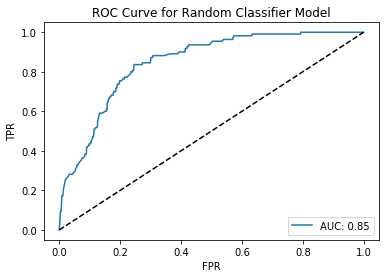

In [53]:
rfclf_tuned.fit(X_train_2_14days_ss, y_train)
y_pred = rfclf_tuned.predict(X_test_2_14days_ss)
y_prob = rfclf_tuned.predict_proba(X_test_2_14days_ss)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

print ('AUC:', auc(fpr, tpr))
print (confusion_matrix(y_test, y_pred))


plt.plot(fpr, tpr, label='AUC: {:.2}'.format(auc(fpr, tpr)))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Random Classifier Model')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc='lower right')

In [41]:
# The following are the features which were of importance to our Random Forest Classifier model
pd.DataFrame(rfclf_tuned.feature_importances_, index=X_train_2_14days.columns).sort_values(by=0, ascending=False)

,0
Month,0.124130
AvgSpeed14_days_Max^2,0.079686
Species_CULEX RESTUANS,0.072507
WetBulb14_days_Max,0.068036
WetBulb14_days_Max^2,0.061655
SeaLevel14_days_Max,0.051876
ResultSpeed14_days_Std_dev^2,0.044430
WetBulb14_days_Avg,0.034333
DewPoint14_days_Avg,0.032735
PrecipTotal14_days_Max,0.028092


## Cost-Benefit Analysis

In order to conduct a cost benefit analysis of our model, we now want to adjust our threshold level so that we can optimize our tpr and fpr. This will be based on the entire training dataset.

In [42]:
X_train_final = pd.concat([X_train_2_14days,X_test_2_14days])
y_train_final = pd.concat([y_train,y_test])

AUC: 0.8658536124065791


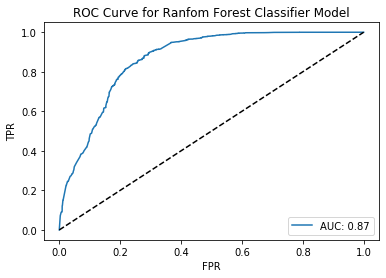

In [44]:
X_train_final_ss = ss.fit_transform(X_train_final)
rfclf_tuned.fit(X_train_final_ss, y_train_final)
y_train_final_pred = rfclf_tuned.predict(X_train_final_ss)
y_train_final_prob = rfclf_tuned.predict_proba(X_train_final_ss)[:,1]
fpr, tpr, thresholds = roc_curve(y_train_final, y_train_final_prob)

print ('AUC:', auc(fpr, tpr))

plt.plot(fpr, tpr, label='AUC: {:.2}'.format(auc(fpr, tpr)))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Ranfom Forest Classifier Model')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc='lower right')

In [45]:
# Classification reports for each threshold corresponding to the TPRs above.
thresh = [[th for t, f, th in zip(tpr, fpr, thresholds) if t >= i][0] for i in [.8, .85, .9, .95, 1]]

for i in thresh:
    predictions = [1 if p >= i else 0 for p in y_train_final_prob]
    print ('threshold:', i)
    print (classification_report(y_train_final, predictions))
    print('\n')

threshold: 0.5471544904322075
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      9955
           1       0.75      0.80      0.78      8073

    accuracy                           0.79     18028
   macro avg       0.79      0.79      0.79     18028
weighted avg       0.80      0.79      0.79     18028



threshold: 0.49052066319943416
              precision    recall  f1-score   support

           0       0.86      0.74      0.80      9955
           1       0.73      0.85      0.78      8073

    accuracy                           0.79     18028
   macro avg       0.79      0.80      0.79     18028
weighted avg       0.80      0.79      0.79     18028



threshold: 0.3908786319299058
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      9955
           1       0.71      0.90      0.79      8073

    accuracy                           0.79     18028
   macro avg       0.80      0.80

In [46]:
# Classification reports for each threshold corresponding to the TPRs above.
for i in thresh:
    predictions = [1 if p >= i else 0 for p in y_train_final_prob]
    print ('threshold:', i)
    print (confusion_matrix(y_train_final, predictions))
    print ('\n')

threshold: 0.5471544904322075
[[7855 2100]
 [1614 6459]]


threshold: 0.49052066319943416
[[7400 2555]
 [1208 6865]]


threshold: 0.3908786319299058
[[6961 2994]
 [ 801 7272]]


threshold: 0.3274817522472637
[[6199 3756]
 [ 403 7670]]


threshold: 0.09983371412701446
[[1887 8068]
 [   0 8073]]




In [47]:
# Average yearly savings associated with each threshold, based on an assumed $100 per test
for i in thresh:
    predictions = [1 if p >= i else 0 for p in y_train_final_prob]
    print ((confusion_matrix(y_train_final, predictions)[0,0] + confusion_matrix(y_train_final, predictions)[1,0])*100/4)

236725.0
215200.0
194050.0
165050.0
47175.0


Text(0.5, 1.0, 'Average Yearly Savings at Various Thresholds')

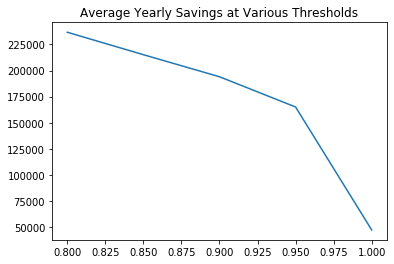

In [48]:
# Cost-Benefit graph
TPR = [.8, .85, .9, .95, 1]
savings = [236725, 215200, 194050, 165050, 47175]
plt.plot(TPR, savings)
plt.title("Average Yearly Savings at Various Thresholds")

## Conclusion

If the City of Chicago and CPHD were to use a predictive model such as the one which we have, they will be able to get a better prediction of when and where different species of mosquitos will test positive for West Nile virus so that they are able to better allocate resources and have a better idea of which mosquito to send for test.

As spraying of insectide is potentially harmful and expensive, and having to send mosquito specimens for lab test also costs money, being equipped with better information on which mosquito specimen to send for test to check if the West Nile Virus is present would lead to average yearly savings. Assuming that each lab test costs $100, these savings can be seen in the diagram above, being plotted against the True Positive Rate.

As observed in the diagram, once the True Positive Rate hits 95%, the savings then starts to drops dramatically. It is therefore recommended for the City of Chicago and CPHD to aim for a True Positive Rate of 95% in order to optimize the cost-benefits. Based on a 95% True Positive Rate, this means that as long as a specimen has a 3.3% chance or more of having the West Nile Virus, it should be sent for a lab test.

## Kaggle Test Set

In [49]:
kaggle_test.rename(columns={'Station':'Station_2'}, inplace=True)
kaggle_test['Station_2'] = kaggle_test['Station_2'].map(lambda x: 1 if x==2 else 0)
diff = [x for x in kaggle_test.columns if x not in X_train_final.columns]
kaggle_test_clean = kaggle_test.drop(diff, axis=1)

kaggle_ss = StandardScaler()
kaggle_X_ss = kaggle_ss.fit_transform(X_train_final)
kaggle_test_clean_ss = ss.transform(kaggle_test_clean)

rfclf_tuned.fit(kaggle_X_ss, y_train_final)
predictions = rfclf_tuned.predict_proba(kaggle_test_clean_ss)

In [50]:
kaggle_submission = pd.read_csv('input/sampleSubmission.csv', index_col='Id')

In [51]:
kaggle_submission['WnvPresent'] = predictions[:,1]

In [52]:
kaggle_submission.to_csv('output/kaggleSubmission.csv')